In [1]:
import pandas as pd
import numpy as py
import warnings
warnings.filterwarnings('ignore')

Process **GDP** data

In [2]:
# read dataset
df_gdp = pd.read_csv("Real GDP Monthly.csv")
df_gdp.head()

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# only get data and GDP data
df_gdp = df_gdp[["Date","Real Gross Domestic Product - Seasonally Adjusted"]]
df_gdp.rename(columns={"Real Gross Domestic Product - Seasonally Adjusted": "Real GDP SA(billion)"}, inplace=True)
df_gdp

,Date,Real GDP SA(billion)
0,01/01/1947 12:00:00 AM,2.182681e+12
1,02/01/1947 12:00:00 AM,NaN
2,03/01/1947 12:00:00 AM,NaN
3,04/01/1947 12:00:00 AM,2.176892e+12
4,05/01/1947 12:00:00 AM,NaN
...,...,...
935,12/01/2024 12:00:00 AM,NaN
936,01/01/2025 12:00:00 AM,NaN
937,02/01/2025 12:00:00 AM,NaN
938,03/01/2025 12:00:00 AM,NaN


In [4]:
# convert date to datetime
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'], format='%m/%d/%Y %I:%M:%S %p')

# get data from 2010/1/1 to 2024/12/31
df_filtered = df_gdp[(df_gdp['Date'] >= '2010-01-01') & (df_gdp['Date'] <= '2024-12-31')]

# set Date as index
df_filtered.set_index('Date', inplace=True)
df_filtered.head()

,Real GDP SA(billion)
Date,
2010-01-01,1.658271e+13
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,1.674316e+13
2010-05-01,NaN


In [5]:
# calculate quarterly GDP
gdp = df_filtered.resample('Q').mean()/ 1_000_000_000

# set index as 'yyyyQk'
gdp.index = gdp.index.to_period('Q')

gdp.head()

,Real GDP SA(billion)
Date,
2010Q1,16582.710
2010Q2,16743.162
2010Q3,16872.266
2010Q4,16960.864
2011Q1,16920.632


process **M1 & M2** data

In [6]:
df_money = pd.read_csv("money supply monthly (M1&M2).csv")
df_money.head(10)

,Series Description,M1; Not seasonally adjusted,M2; Not seasonally adjusted,Currency; Not seasonally adjusted,Demand deposits; Not seasonally adjusted,Other liquid deposits - Total; Not seasonally adjusted,Small-denomination time deposits - Total; Not seasonally adjusted,Retail money market funds; Not seasonally adjusted,IRA and Keogh accounts at depository institutions; Not seasonally adjusted. Last 5 obs are estimates.,IRA and Keogh accounts at money market funds; Not seasonally adjusted. Last 5 obs are estimates.,...,Monetary base; total; not seasonally adjusted,"Reserves of depository institutions, total; not seasonally adjusted",Total borrowings from the Federal Reserve; not seasonally adjusted,"Reserves of depository institutions, nonborrowed; not seasonally adjusted",Other checkable deposits - Total; Not seasonally adjusted; *Discontinued after Apr 2020,Savings deposits - Total; Not seasonally adjusted; *Discontinued after Apr 2020,Travelers checks; Not seasonally adjusted; *Discontinued after Dec 2018,Other checkable deposits - Total; Seasonally adjusted; *Discontinued after Apr 2020,Savings deposits - Total; Seasonally adjusted; *Discontinued after Apr 2020,Travelers Checks; Seasonally adjusted; *Discontinued after Dec 2018
0,Unit:,Currency,Currency,Currency,Currency,Currency,Currency,Currency,Currency,Currency,...,Currency,Currency,Currency,Currency,Currency,Currency,Currency,Currency,Currency,Currency
1,Multiplier:,1e+09,1e+09,1e+09,1e+09,1e+09,1e+09,1e+09,1e+09,1e+09,...,1e+09,1e+09,1000000,1e+09,1e+09,1e+09,1e+09,1e+09,1e+09,1e+09
2,Currency:,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
3,Unique Identifier:,H6/H6_M1/M1_N.M,H6/H6_M2/M2_N.M,H6/H6_M1/MCU_N.M,H6/H6_M1/MDD_N.M,H6/H6_M1/MDL_N.M,H6/H6_M2/MDTS_N.M,H6/H6_M2/MMFGB_N.M,H6/H6_MEMO/MIKD_N.M,H6/H6_MEMO/MIKM_N.M,...,H6/H6_MBASE/RESMO14A_N.M,H6/H6_MEMO/RESTR14A_N.M,H6/H6_MEMO/RESBR14A_N.M,H6/H6_MEMO/RESNB14A_N.M,H6/H6_M1/MDO_N.M,H6/H6_M2/MDU_N.M,H6/H6_M1/MTC_N.M,H6/H6_M1/MDO.M,H6/H6_M2/MDU.M,H6/H6_M1/MTC.M
4,Time Period,M1_N.M,M2_N.M,MCU_N.M,MDD_N.M,MDL_N.M,MDTS_N.M,MMFGB_N.M,MIKD_N.M,MIKM_N.M,...,RESMO14A_N.M,RESTR14A_N.M,RESBR14A_N.M,RESNB14A_N.M,MDO_N.M,MDU_N.M,MTC_N.M,MDO.M,MDU.M,MTC.M
5,1959-01,142.2,289.8,28.4,113.4,NaN,11.7,NaN,0.0,0.0,...,50.5,18.9,551.8,18.3,0.0,136.0,0.3,0.0,136.0,0.3
6,1959-02,139.3,287.7,28.2,110.8,NaN,11.7,NaN,0.0,0.0,...,49.8,18.6,505.0,18.1,0.0,136.7,0.3,0.0,136.6,0.3
7,1959-03,138.4,287.9,28.3,109.8,NaN,11.8,NaN,0.0,0.0,...,49.7,18.4,599.5,17.8,0.0,137.7,0.3,0.0,137.6,0.3
8,1959-04,139.7,290.2,28.3,111.1,NaN,12.0,NaN,0.0,0.0,...,50.1,18.7,691.6,18.0,0.0,138.5,0.3,0.0,138.4,0.3
9,1959-05,138.7,290.2,28.5,109.8,NaN,12.2,NaN,0.0,0.0,...,50.1,18.6,741.5,17.8,0.0,139.3,0.3,0.0,139.5,0.3


In [7]:
# delete unecessary rows
df_money_cleaned = df_money.drop(index=df_money.index[:5]).reset_index(drop=True)

# only get Date, M1 and M2 data
df_money_cleaned = df_money_cleaned[['Series Description', 'M1; Seasonally adjusted', 'M2; Seasonally adjusted']]
df_money_cleaned.columns = ['Date', 'M1 SA(billion)', 'M2 SA(billion)']

# convert to numerical
df_money_cleaned['M1 SA(billion)'] = pd.to_numeric(df_money_cleaned['M1 SA(billion)'], errors='coerce')
df_money_cleaned['M2 SA(billion)'] = pd.to_numeric(df_money_cleaned['M2 SA(billion)'], errors='coerce')

# to datetime
df_money_cleaned['Date'] = pd.to_datetime(df_money_cleaned['Date'], format='%Y-%m')

# filter time range
df_money_filtered = df_money_cleaned[(df_money_cleaned['Date'] >= '2010-01-01') & (df_money_cleaned['Date'] <= '2024-12-31')]

# set Date to index
df_money_filtered.set_index('Date', inplace=True)

# calculate quarterly data
money = df_money_filtered.resample('Q').mean()

#reset index
money.index = money.index.to_period('Q')

# calculate M2-M1
money['M2-M1 SA(billion)'] = money['M2 SA(billion)'] - money['M1 SA(billion)']

money.head()

,M1 SA(billion),M2 SA(billion),M2-M1 SA(billion)
Date,,,
2010Q1,1695.466667,8509.766667,6814.300000
2010Q2,1713.566667,8597.600000,6884.033333
2010Q3,1746.300000,8682.300000,6936.000000
2010Q4,1815.166667,8793.633333,6978.466667
2011Q1,1870.966667,8907.066667,7036.100000


process **M2 velocity** data

In [8]:
velocity = pd.read_csv("M2V Velocity quarterly.csv")
velocity.head(10)

,observation_date,M2V
0,2010-01-01,1.735
1,2010-04-01,1.742
2,2010-07-01,1.744
3,2010-10-01,1.741
4,2011-01-01,1.724
5,2011-04-01,1.709
6,2011-07-01,1.652
7,2011-10-01,1.645
8,2012-01-01,1.640
9,2012-04-01,1.629


In [9]:
# to datetime
velocity['observation_date'] = pd.to_datetime(velocity['observation_date'], format='%Y-%m-%d')

# convert 'observation_date' to 'yyyyQk'
velocity['observation_date'] = velocity['observation_date'].dt.to_period('Q')

# rename column 'date'
velocity.rename(columns={'observation_date': 'Date'}, inplace=True)

# set Date as index
velocity.set_index('Date', inplace=True)

velocity.head()

,M2V
Date,
2010Q1,1.735
2010Q2,1.742
2010Q3,1.744
2010Q4,1.741
2011Q1,1.724


process **interest rate** data

In [10]:
df_rate = pd.read_csv("bank prime rate daily.csv")
df_rate

,observation_date,DPRIME
0,2010-01-04,3.25
1,2010-01-05,3.25
2,2010-01-06,3.25
3,2010-01-07,3.25
4,2010-01-08,3.25
...,...,...
3982,2025-04-09,7.50
3983,2025-04-10,7.50
3984,2025-04-11,7.50
3985,2025-04-14,7.50


In [11]:
# reset colummn name
df_rate.rename(columns={'observation_date': 'Date', 'DPRIME': 'Prime Rate(%)'}, inplace=True)

# to datetime
df_rate['Date'] = pd.to_datetime(df_rate['Date'], format='%Y-%m-%d')

# filter date
rate_filtered = df_rate[(df_rate['Date'] >= '2010-01-01') & (df_rate['Date'] <= '2024-12-31')]

# set Date to index
rate_filtered.set_index('Date', inplace=True)

# calculate quarterly Prime Rate
rate = rate_filtered.resample('Q').mean()

# reset index
rate.index = rate.index.to_period('Q')

rate.tail()

,Prime Rate(%)
Date,
2023Q4,8.500000
2024Q1,8.500000
2024Q2,8.500000
2024Q3,8.437500
2024Q4,7.823077


In [12]:
# combine four dataframe
macro_df = gdp.join([money, velocity, rate], how='inner')
# drop M1
macro_df = macro_df.drop(columns=["M1 SA(billion)"])

macro_df.head()

,Real GDP SA(billion),M2 SA(billion),M2-M1 SA(billion),M2V,Prime Rate(%)
Date,,,,,
2010Q1,16582.710,8509.766667,6814.300000,1.735,3.25
2010Q2,16743.162,8597.600000,6884.033333,1.742,3.25
2010Q3,16872.266,8682.300000,6936.000000,1.744,3.25
2010Q4,16960.864,8793.633333,6978.466667,1.741,3.25
2011Q1,16920.632,8907.066667,7036.100000,1.724,3.25


In [13]:
# save to csv
macro_df.to_csv('Macro Data.csv', index=True)

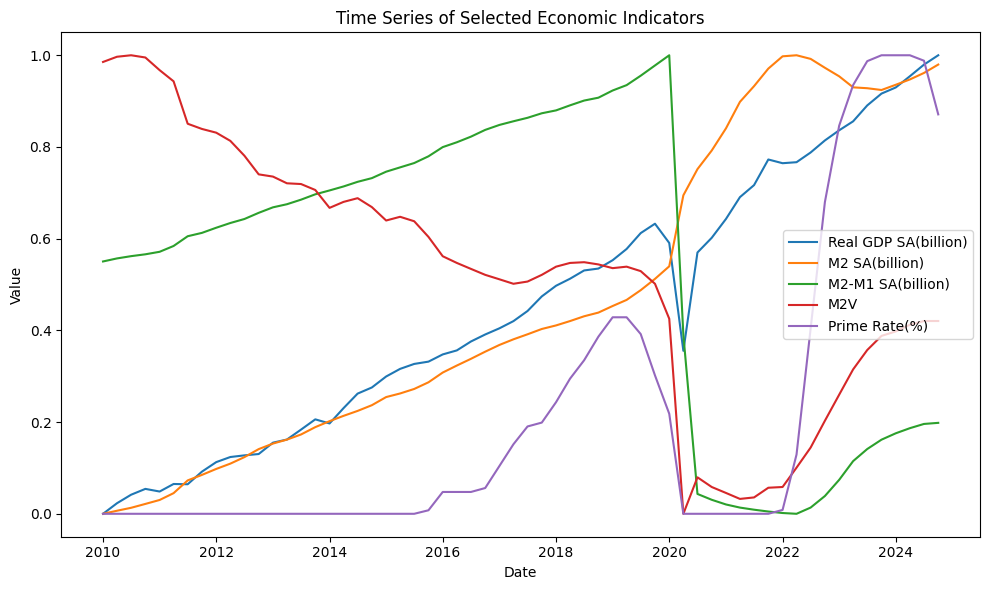

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

columns = ["Real GDP SA(billion)", "M2 SA(billion)", "M2-M1 SA(billion)", "M2V", "Prime Rate(%)"]

# MinMaxScaler
scaler = MinMaxScaler()
macro_df[columns] = scaler.fit_transform(macro_df[columns])

# change quarter date to timestamp
macro_df.index = macro_df.index.to_timestamp()

# draw time series graph for each column
plt.figure(figsize=(10, 6))

for col in columns:
    plt.plot(macro_df.index, macro_df[col], label=col)

plt.title("Time Series of Selected Economic Indicators")
plt.xlabel("Date")
plt.ylabel("Value")

plt.legend()

plt.tight_layout()
plt.show()